### BER-curves: BER versus $\rho=$ SNR for BSC and BSC with Rep(3) 

In [1]:
from PyM import *

log10=np.log10

# Auxiliary functions
def dB(X): return 10*log10(x)  # X in decibel
def dBi(x): return 10**(x/10)  # dB invers

# Main functions: Gauss normal density and Q(x)
def gauss(x): return (1/sqrt(2*pi))*exp(-x**2/2)

K = 0.2316419
a0 = 0.31981530; a1 = -0.356563782; a2 = 1.781477937
a3 = -1.821255978; a4 = 1.330274429
def Q(x):
    s = 1/(1+K*x)
    f = a0+a1*s+a2*s**2+a3*s**3+a4*s**4
    return gauss(x)*s*f

#### BER curves for BSC and Rep(3)
The $\log$10 in front of the returned expressions simply means that the
vertical axis is scaled logarithmically. If $r$ is a number quoted in dB,
$x =$ dBi($r$)is the same number on the normal standard scale and $p=Q(\sqrt{2x})$
is the probability of a bit-error for a signal-to-noise ratio $r$. So $B(r)$ is the probability in a logarithmic scale of a bit-error for a SNR $r$. Similarly, $R(r)$ is the probability
of a bit-error when using the Rep(3) code.

In [2]:
def B(r): return log10(Q( sqrt(2*dBi(r)) ))
def R(r):
    p = Q(sqrt(2*dBi(r)))
    return log10(3*p**2*(1-p)+p**3)

#### Drawing

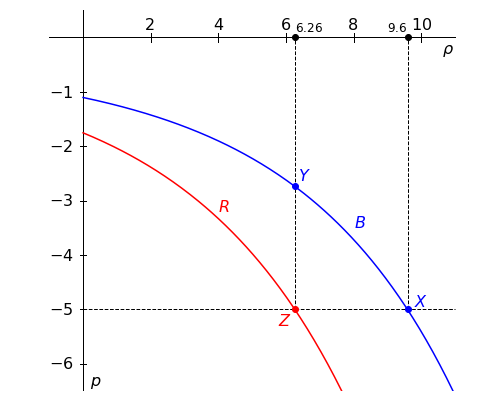

In [3]:
# Important points
def X(k): return (k,0)
def Y(k): return (0,k)

# Range horizontal axis 
r = ls(0,11,220)


# plotting
close('all')

dx = 0.2; dy = 0.1

ax = plt.figure("BER curves", figsize=(8,7))
plt.xlim(-8*dx,10+8*dx)
plt.ylim(-6-5*dy,5*dy)
plt.axis('off')

def vtick(x,l=0.01): return seg((x,-l),(x,l))
def htick(y,l=0.01): return seg((-l,y),(l,y))

ruler(X(0),X(10), left_inc=10, right_inc=10)
ruler(X(0),Y(-6), left_inc=10, right_inc=10)
ruler(Y(-5),(10,-5), left_inc=0,right_inc=10,dashing='--')
#ruler((-3,1),(3,1),lw=1)
ruler((6.26,-5),(6.26,0), left_inc=0,right_inc=0,dashing='--')
ruler((9.6,-5),(9.6,0), left_inc=0,right_inc=0,dashing='--')

for a in [2,4,6,8,10]:
    vtick(a,0.4*dx)
for b in [-1,-2,-3,-4,-5,-6]:
    htick(b,dy)

# Bullets
bullet((6.26,0))
bullet((9.6,0))
bullet((6.26,-5), color='red')
bullet((6.26,-2.74), color='blue')
bullet((9.6,-5), color='blue')


# Drawing the curves B and R
plot(r,B(r),color='blue')
plot(r,R(r),color='red')


# labeling
for j in [2,4,6,8]:
    lable(X(j),str(j),dx=-0.8*dx,dy=1.5*dy,fs=16)

lable(X(10),'$10$',dx=-1.5*dx,dy=1.5*dy,fs=16)
lable((9.6,0),'$9.6$',dx=-3*dx,dy=dy,fs=12)
lable((6.26,0),'$6.26$',dx=-0*dx,dy=dy,fs=12)

for j in range(1,7):
    lable(Y(-j),'$-$'+str(j),dx=-5*dx,dy=-dy,fs=16)

lable((8,-3.5),'$B$',fs=16, color='blue')
lable((4,-3.2),'$R$',fs=16, color='red')
lable((9.6,-5),'$X$',dx=dx,dy=0.5*dy,fs=16, color='blue')
lable((6.26,-2.74),'$Y$',fs=16, dx=0.5*dx,dy=dy, color='blue')
lable((6.26,-5),'$Z$',fs=16,dx=-2.5*dx,dy=-3*dy, color='red')
lable((0,-6.4),'$p$',fs=16,dx=1*dx,dy=0*dy)
lable((10.6,0),r'$\rho$',fs=16,dx=0*dx,dy=-3*dy)


plt.show()